In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

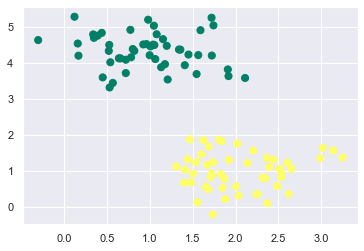

In [38]:
from sklearn.datasets import make_blobs   #random 2 sınıf olusturduk
X,y= make_blobs(n_samples=100,centers=2, random_state=0, cluster_std= 0.50)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap="summer" )

(-1.0, 3.5)

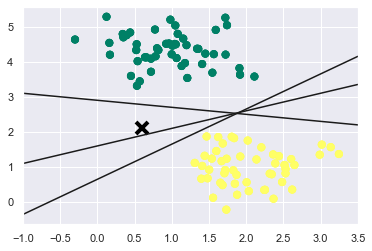

In [39]:
xfit=np.linspace(-1,3.5)
plt.plot([0.6],[2.1],"x",color="black",markeredgewidth=4,markersize=12)

for m,b in[(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap="summer" )  
    plt.plot(xfit,m*xfit+b,"-k")
plt.xlim(-1,3.5)

(-1.0, 3.5)

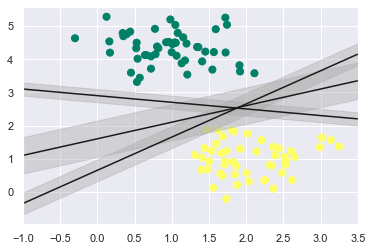

In [40]:
xfit=np.linspace(-1,3.5)   
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap="summer" )
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,"-k")
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor="none", color="#AAAAAA", alpha=0.4)
    
plt.xlim(-1,3.5)

In [41]:
from sklearn.svm import SVC
model=SVC(kernel="linear", C= 1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

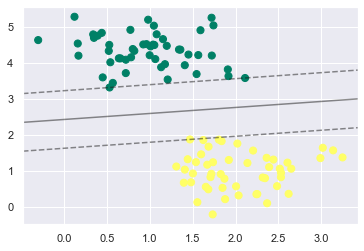

In [42]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)

In [43]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

## KNN (K NEAREST NEIGHBOUR)

"""
1-öklid mesafesi    -- L1 norm
2-Manhattan mesafesi --L2 norm
3-Minkowski Distance -- Lp norm
4-Hamming Distance -- 

"""

In [44]:
"""
-K Degeri secilir. tek bir sayı
-Egitim verisi içerisindeki her bir noktanın, yeni noktaya olan mesafesi ölcülür.
-K adet en yakın komşu bulunur.
-Her bir sınıftaki veri noktaları sayılarak daha fazla komsuya sahip olunan kategori yeni sınıf olarak belirlenir
"""

'\n-K Degeri secilir. tek bir sayı\n-Egitim verisi içerisindeki her bir noktanın, yeni noktaya olan mesafesi ölcülür.\n-K adet en yakın komşu bulunur.\n-Her bir sınıftaki veri noktaları sayılarak daha fazla komsuya sahip olunan kategori yeni sınıf olarak belirlenir\n'

In [45]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [46]:
data=pd.read_csv("data_cleaned.csv")

In [47]:
data=pd.DataFrame(data)

In [48]:
data.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [49]:
data.shape

(891, 25)

In [50]:
data.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [51]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=56, stratify= y)

In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [55]:
classifier = KNN(n_neighbors = 10, metric = 'euclidean') #k = 10

classifier.fit(train_x, train_y)

test_predict = classifier.predict(test_x)

k_1 = f1_score(test_predict, test_y)


In [56]:
def Elbow(K):
    test_error= []
    for i in K:
        classifier= KNN(n_neighbors=i)
        classifier.fit(train_x,train_y)
        tmp=classifier.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [57]:
k = range(6, 50, 2)

In [58]:
test=Elbow(k)


Text(0.5, 1.0, 'Elbow curve for test')

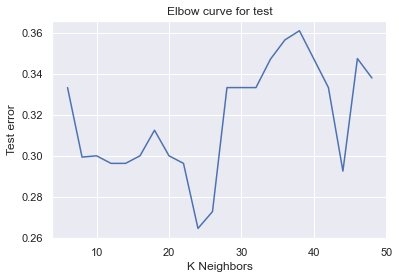

In [59]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [60]:
classifier=KNN(n_neighbors=27)
classifier.fit(train_x,train_y)
test_predict= classifier.predict(test_x)
k_2=f1_score(test_predict,test_y)

In [61]:
print("Before Elbow Method Knn Score:", k_1)
print("After Elbow Method to put right K_value KNN score",k_2)

Before Elbow Method Knn Score: 0.7000000000000001
After Elbow Method to put right K_value KNN score 0.7435897435897435
